# Intelligent Agents and Active Inference

### Preliminaries

- Goal 
  - Introduction to Active Inference and application to the design of synthetic intelligent agents 
- Materials        
  - Mandatory
    - These lecture notes
    - Karl Friston - 2016 - [The Free Energy Principle](https://www.youtube.com/watch?v=NIu_dJGyIQI) (video)
  - Optional
    - Raviv (2018), [The Genius Neuroscientist Who Might Hold the Key to True AI](https://www.wired.com/story/karl-friston-free-energy-principle-artificial-intelligence/).
        - Interesting article on Karl Friston, who is a leading theoretical neuroscientist working on a theory that relates life and intelligent behavior to physics (and Free Energy minimization). (**highly recommended**) 
    - Kirsch (2019), [Theories of Intelligence (2/2): Active Inference](http://louiskirsch.com/ai/active-inference) 
        - A nice tutural blog on active inference.
    - Van de Laar and De Vries (2019), [Simulating Active Inference Processes by Message Passing](https://www.frontiersin.org/articles/10.3389/frobt.2019.00020/full)
        - How to implement active inference by message passing in a Forney-style factor graph.

  - References
    - Friston (2013), [Life as we know it](https://royalsocietypublishing.org/doi/full/10.1098/rsif.2013.0475) 
    - Conant and Ashby (1970), [Every good regulator of a system must be a model of that system](https://www.tandfonline.com/doi/abs/10.1080/00207727008920220)

### Agents

- In the previous lessons we assumed that a data set was given. 
- In this lesson we consider _agents_. An agent is a system that _interacts_ with its environment through both sensors and actuators.
- Crucially, by acting onto the environment, the agent is able to affect the data that it will sense in the future.
  - As an example, by changing the direction where I look, I can affect the sensory data that will be sensed by my retina.
- With this definition of an agent, (biological) organisms are agents, and so are robots, self-driving cars, etc.
- In an engineering context, we are particularly interesting in agents that behave with a *purpose* (with a goal in mind), e.g. to drive a car or to design a speech recognition algorithm.
- In this lesson, we will describe how __goal-directed behavior__ by biological (and synthetic) agents can also be interpreted as minimization of a free energy functional $F[q]$. 

### Illustrative Example: Steering a cart to a parking spot

- In this example, we consider a cart that can move in a 1D space. At each time step the cart can be steered a bit to the left or right by a controller (the "agent"). The agent's knowledge about the cart's process dynamics (equations of motion) are known up to some additive Gaussian process noise. The agent also makes noisy observations of the position and velocity of the cart. Your challenge is to design an agent that steers the car to the zero position. (The agent should be specified as a probabilistic model and the control signal should be formulated as a Bayesian inference task).  


<img src="./ai_agent/agent-cart-interaction.png" width="600px">

- Solution at the end of this lesson.

### Karl Friston and the Free Energy Principle

- We begin with a motivating example that requires "intelligent" goal-directed decision making: assume that you are an owl and that you're hungry. What are you going to do?

- Have a look at [Prof. Karl Friston](https://www.wired.com/story/karl-friston-free-energy-principle-artificial-intelligence/)'s answer in this  [video segment by on the cost function for intelligent behavior](https://www.vibby.com/watch?vib=71iPtUJxd). (**Do watch the video!**)

- Friston argues that intelligent decision making (behavior, action making) by an agent requires *minimization of a functional of beliefs*. 

- Friston further argues that this functional is a (variational) free energy (to be defined below), thus linking decision making to Bayesian inference. 

- In fact, Friston's **Free Energy Principle** (FEP) claims that all [biological self-organizing processes (including brain processes) can be described as Free Energy minimization in a probabilistic model](https://royalsocietypublishing.org/doi/full/10.1098/rsif.2013.0475).
  - This includes perception, learning, attention mechanisms, recall, action and decision making, etc.
  
- Taking inspiration from FEP, if we want to develop synthetic "intelligent" agents, we have (only) two issues to consider:
  1. The specification of the FE functional (includes specification of generative model and constraints on the approximate posterior, a.k.a. the "recognition" model).
  2. *How* to minimize the FE functional? 


### What Makes a Good Agent?

- What should the agent's model be modeling? This question was (already) answered by [Conant and Ashby (1970)](https://www.tandfonline.com/doi/abs/10.1080/00207727008920220) as the [*good regulator theorem*](https://en.wikipedia.org/wiki/Good_regulator ): **every good regulator of a system must be a model of that system**. 
  
- From Conant and Ashby's paper (this statement was later finessed by [Friston (2013)](https://royalsocietypublishing.org/doi/full/10.1098/rsif.2013.0475)): 
> The theory has the interesting corollary that the living brain, insofar as it is successful and efficient as a regulator for survival, *must* proceed, in learning, by the formation of a model (or models) of its environment."

<img style="border:2px solid #000000; width:600px" src="./figures/good-regulator.png">

### Active Inference Agents 

- We will follow the idea that an agent needs to hold a generative model for its environment, which is observed through sensory channels. The environmental dynamics can be affected through actions onto the environment.

- Agents that follow the FEP and infer actions by inference in a generative model of the environment are engaged in a process called **active inference**. Let's draw a diagram to show the interactions between an active inference agent and its environment. 


<img src="./figures/agent-environment-interaction.png" width="600px">

### Active Inference Specification 

- An active inference-based agent comprises 
  1. A free energy functional $F[q] = \mathbb{E}_q\left[ \log\frac{q(z)}{p(x,z)}\right]$, where
    - $p(x,z) = \prod_k p(x_k,z_k|z_{k-1})$ is a _generative_ model with observations $\{x_k\}$, latent variables $\{z_k\} = \left\{ \{s_k\}, \{u_k\}, \{\theta_k\}\right\}$ and $k$ is a time index.
    - $q(z)$ is a _recognition_ model.
  2. A recipe to minimize the free energy $F[q]$

- In the model above, the hidden variables $\{z_k\}$ of the agent comprise *internal* states $\{s_k\}$, *control* variables $\{u_k\}$ (which are "observed" by the environment as actions $\{a_k\}$), and *parameters* $\{\theta_k\}$.   

- We also assume that the agent interacts with an environment, which we represent by a dynamic model
$$
(y_t,\tilde{s}_t) = R_t\left( a_t,\tilde{s}_{t-1}\right)
$$
where $a_t$ are _actions_ , $y_t$ are _outcomes_ and $\tilde{s}_t$ holds the environmental _states_. 

- In the above equations, $u_t$ and $x_t$ are owned by the agent model, whereas $a_t$ and $y_t$ are variables in the environment model.

- The agent can push actions $a_t$ onto the environment and measure responses $y_t$, but has no access to the environmental states $\tilde{s}_t$.

- Interactions between the agent and environment are described by 
$$\begin{align*}
a_t &\sim q(u_t) \\
x_t &= y_t 
\end{align*}$$
iow, actions are drawn from the posterior over control signals. 



- Note that this system implies a recursive dependency since the agent's future observations depend on the agent's current (and past) actions: $$x_{t+1} = x_{t+1} \left( a_{t+1} \right) = x_{t+1} \left( a_{t+1} \left( u_{t+1}\left( x_t \left( a_t \left( \cdots \right) \right) \right)\right) \right)$$
  - $\Rightarrow$ As a result, **the agent actively engages in selecting its own data set!**

### Biological Interpretation and Goal-directed Behavior

- In biotic parlance, 
  - _behavior_ is inference for the control signals ($u$)
  - _perception_ is inference for the internal states ($s$). 
  - _learning_ is inference for the parameters ($\theta$)
 
- The CA decomposition of free energy shows that _actions_ aim to maximize accuracy since model complexity is not a function of the observations (and $x = x(a)$) 
$$ F[q]=  \underbrace{\sum_z q(z)\log\frac{q(z)}{p(z)}}_{\text{complexity}} - \underbrace{\sum_z q(z) \log p(x|z)}_{\text{accuracy}}$$

- The DE decomposition reveals that _perception_ and _learning_ minimize inference costs since log-evidence is not affected by inference (not a function of $q$)
$$F[q] = \underbrace{\sum_z q(z) \log \frac{q(z)}{p(z|x)}}_{\substack{\text{divergence}\\ \text{"inference costs"}}} - \underbrace{\log p(x)}_{\text{log-evidence}}$$

<!---
- Finally, the EE decomposition discloses a deep link with the 2nd law of thermodynamics (drive towards maximum entropy). An agent aims to maximize entropy over its beliefs subject to constraints put up by its generative model and inference skills (the energy term)
$$F[q] = \underbrace{-\sum_z q(z) \log p(x,z)}_{\text{energy}} - \underbrace{\sum_z q(z) \log \frac{1}{q(z)}}_{\text{entropy}}$$
--->

- Biological agents select their observations by controling their environment. Perception (and learning) serve to improve this data selection process by updating beliefs about the state of the world. 

- This process begs the question: if a (biological) agent seeks out observations, then which observations is the agent interested in? I.o.w. does the agent have a **goal** "in mind" when it engages in active data selection?

- Yes! Agents set preferences for observations by prior distributions on *future* sensations! 
  - E.g. a self-driving agent in a car expects to observe no collisions.

### Model specification

- We assume that agents live in a dynamic environment and consider the following generative model for the agent (omitting parameters $\theta$), and assuming the current time is $t$:
$$\begin{align*}
p^\prime(x,s,u) &= p(s_{t-1}) \prod_{k=t}^{t+T} \underbrace{p(x_k|s_k) \cdot p(s_k | s_{k-1}, u_k)}_{\text{internal dynamics}} \cdot\underbrace{p(u_k)}_{\substack{\text{control prior}}}
\end{align*}$$

- Note that the generative model at time $t$ can be run to make predictions (beliefs) about future observations $x_{t+1:T}$.   

- In order to infer *goal-driven* (i.e., purposeful) behavior, we now add prior beliefs $p^+(x)$ about desired future observations, leading to an *extended* agent model:
$$\begin{align*}
p(x,s,u) &= \frac{p^\prime(x,s,u) p^+(x)}{\int_x p^\prime(x,s,u) p^+(x) \mathrm{d}x} \\
  &\propto \underbrace{p(s_{t-1}) \prod_{k=t}^{t+T} p(x_k|s_k) p(s_k | s_{k-1}, u_k) p(u_k)}_{\text{original generative model}} \underbrace{p^+(x_k)}_{\substack{\text{extension}\\\text{"goal prior"}}}
\end{align*}$$

- Goal-directed behavior follows from inference for controls (actions) at $t$, based on expectations (encoded by priors) about future ($>t$) observations.

- $\Rightarrow$ Actions fulfill expectations about the future!


### FFG for Agent Model

- After selecting an action $a_t$ and making an observation $y_t$, the FFG for the extended generative model is given by the following FFG:

<img src="./figures/fig-active-inference-model-specification.png" width="800px">

- The (brown) dashed box is the agent's Markov blanket. Given the states on the Markov blanket, the internal states of the agent are independent of the state of the world.   


### Online Active Inference

- Online active inference proceeds by iteratively executing three stages: (1) act-execute-observe, (2) infer the next control/action, (3) slide forward

<img src="./figures/fig-online-active-inference.png" width="600px">

In [1]:
using Pkg;Pkg.activate("probprog/workspace");Pkg.instantiate()
IJulia.clear_output()

0

### The Cart Park Problem Revisited

Here we solve the cart parking problem as stated at the beginning of this lesson. We first specify a generative model for the agent's environment (which is the observed noisy position of the cart) and then constrain future observations by a prior distribution that is located on the target parking spot. Next, we schedule a message passing-based inference algorithm for the next action. This is followed by executing the "Act-execute-observe --> infer --> slide" procedure to infer a sequence of consecutive actions. Finally, the position of the cart over time is plotted. Note that the cart convergees onto the target spot.   




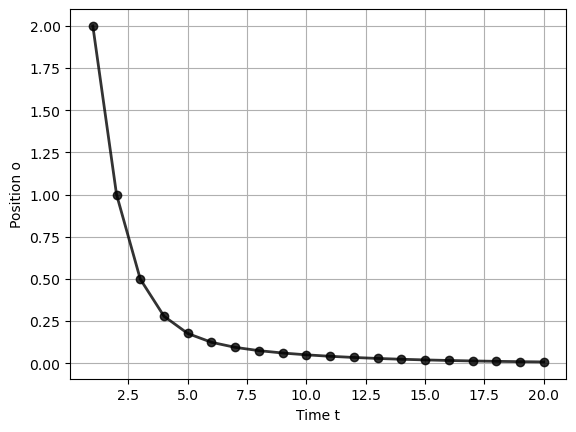

In [2]:
using PyPlot, LinearAlgebra, ForneyLab
# Load helper functions. Feel free to explore these
include("ai_agent/environment_1d.jl")
include("ai_agent/helpers_1d.jl")
include("ai_agent/agent_1d.jl")

# Internal model perameters
gamma   = 100.0 # Transition precision
phi     = 10.0 # Observation precision
upsilon = 1.0 # Control prior variance
sigma   = 1.0 # Goal prior variance

T = 10 # Lookahead

# Build internal model
fg = FactorGraph()

o = Vector{Variable}(undef, T) # Observed states
s = Vector{Variable}(undef, T) # internal states
u = Vector{Variable}(undef, T) # Control states

@RV s_t_min ~ GaussianMeanVariance(placeholder(:m_s_t_min),
                                   placeholder(:v_s_t_min)) # Prior  state
u_t = placeholder(:u_t)
@RV u[1] ~ GaussianMeanVariance(u_t, tiny)
@RV s[1] ~ GaussianMeanPrecision(s_t_min + u[1], gamma) 
@RV o[1] ~ GaussianMeanPrecision(s[1], phi)
placeholder(o[1], :o_t)

s_k_min = s[1]
for k=2:T
    @RV u[k] ~ GaussianMeanVariance(0.0, upsilon) # Control prior
    @RV s[k] ~ GaussianMeanPrecision(s_k_min + u[k], gamma) # State transition model
    @RV o[k] ~ GaussianMeanPrecision(s[k], phi) # Observation model
    GaussianMeanVariance(o[k], 
                         placeholder(:m_o, var_id=:m_o_*k, index=k-1),
                         placeholder(:v_o, var_id=:v_o_*k, index=k-1)) # Goal prior
    s_k_min = s[k]
end

# Schedule message passing algorithm
algo = sumProductAlgorithm(u[2]) # Infer internal states
eval(Meta.parse(algo)) # Loads the step!() function for inference

s_0 = 2.0 # Initial State

N = 20 # Total simulation time

(execute, observe)  = initializeWorld() # Let there be a world
(infer, act, slide) = initializeAgent() # Let there be an agent

# Step through action-perception loop
u_hat = Vector{Float64}(undef, N) # Actions
o_hat = Vector{Float64}(undef, N) # Observations
for t=1:N
    u_hat[t] = act() # Evoke an action from the agent
               execute(u_hat[t]) # The action influences hidden external states
    o_hat[t] = observe() # Observe the current environmental outcome (update p)
               infer(u_hat[t], o_hat[t]) # Infer beliefs from current model state (update q)
               slide() # Prepare for next iteration
end

# Plot active inference results
plotTrajectory(u_hat, o_hat)
;

### Extensions

- If interested, here is a link to [a more detailed version of the 1D parking problem](ai_agent/robot_car_1d.ipynb). 

- We also have a [2D version of this cart parking problem implemented on Raspberry Pi-based robot](ai_agent/robot_car_2d.ipynb). (Credits for this implemention to [Thijs van de Laar](https://biaslab.github.io/member/thijs) and [Burak Ergul](https://biaslab.github.io/member/burak). 

- See [this video to verfiy that the robot will be steered to the correct parking spot even after an "adversarial" intervention](ai_agent/navigation_intervention.mp4) :)



## <center>OPTIONAL SLIDES</center>

### Specification of Free Energy 

- Consider the agent's inference task at time step $t$, right after having selected an action $a_t$ and having made an observation $y_t$.

- As usual, we record actions and observations by substituting the values into the generative model(in the Act-Execute-Observe phase):
$$\begin{align*}
p(x,s,u) &\propto  \underbrace{p(x_t=y_t|s_t)}_{\text{observation}} p(s_t|s_{t-1},u_t) p(s_{t-1}) \underbrace{p(u_t=a_t)}_{\text{action}} \\ & \quad \cdot \underbrace{\prod_{k=t+1}^{t+T} p(x_k|s_k) p(s_k | s_{k-1}, u_k) p(u_k) p^+(x_k)}_{\text{future}}
\end{align*}$$


- Note that (future) $x$ is also a latent variable and hence we include $x$ in the recognition model.  

- This leads to the following free energy functional
$$\begin{align*}
F[q] &\propto \sum_{x,s,u} q(x,s,u) \log \frac{q(x,s,u)}{p(x,s,u)} 
\end{align*}$$

### FE Decompositions 

- Lots of interesting FE decompositions are possible again. For instance
$$\begin{align*}
F[q] &\propto \sum_{x,s,u} q(x,s,u) \log \frac{q(x,s,u)}{p(x,s,u)} \\
&= \sum_{u} q(u) \underbrace{\sum_{x,s} q(x,s|u)\log \frac{q(x,s|u)}{p(x,s|u)}}_{F_u[q]} + \underbrace{\sum_{u} q(u) \log \frac{q(u)}{p(u)}}_{\text{complexity}}
\end{align*}$$
breaks the FE into a complexity term and a term $F_u[q]$ that is conditioned on the policy $u$. 

- It can be shown (exercise) that the optimal posterior for the policy is now given by
$$
q^*(u) \propto p(u) \exp \left( -F^*_u \right)
$$

- Let's consider a break-up $x=(x_t,x_{>t})$ with $x_{>t} = (x_{t+1},\ldots,x_{t+T})$ that recognizes the distinction between already observed and future data. Then
$$\begin{align*}
F_u[q] &= \underbrace{-\log p(x_t)}_{\substack{-\log(\text{evidence})  \\ \text{(surprise)}}} + \underbrace{\sum_{x,s} q(x_{>t},s|u)\log \frac{q(x_{>t},s|u)}{p(x_{>t},s|u)}}_{\substack{\text{divergence}\\ \text{(inference costs)}}}\,.
\end{align*}$$

- The inference costs (divergence term) can be further decomposed to 
$$\begin{align*} \underbrace{-\sum_{x} q(x_{>t}) \log p(x_{>t})}_{\substack{\text{expected surprise}  \\ \text{(goal-directed, pragmatic costs)}}} + \underbrace{\sum_{x,s} q(x_{>t},s|u) \log \frac{q(x_{>t},s|u)}{p(s|x_{>t},u)}}_{\text{epistemic costs}}
\end{align*}$$

- Minimizing goal-directed costs selects actions that (expect to) fullfil the priors over future observations. Minimization of epistemic ("knowledge seeking") costs leads to actions that maximize information gain about the environmental dynamics. This can be seen by further decomposition of the epistemic costs into
$$\begin{align*}
&\sum_{x,s} q(x_>t,s|u) \log \frac{q(s|u)}{p(s|x_{>t},u)} + \sum_{x,s} q(x_{>t},s|u) \log q(x_{>t}|s,u) \\
\approx &\underbrace{\sum_{x,s} q(x_>t,s|u) \log \frac{q(s|u)}{q(s|x_{>t},u)}}_{-\text{mutual information}} - \underbrace{\mathbb{E}_{q(s|u)}\left[ H\left[ q(x_{>t}|s,u)\right]\right]}_{\text{ambiguity}} 
\end{align*}$$
where we used the approximation $q(s|x_{>t},u) \approx p(s|x_{>t},u)$ to illuminate the link to the mutual information. 

- Minimizing FE leads (approximately) to mutual information maximization between internal states $s$ and observations $x$. In other words, FEM leads to actions that aim to seek out observations that are maximally informative about the hidden causes of these observations. 

- Ambiguous states have uncertain mappings to observations. Minimizing FE leads to actions that try to avoid ambiguous states. 

- In short, if the generative model includes variables that represent (yet) unobserved future observations, then action selection by FEM leads to a very sophisticated behavioral strategy that is maximally consistent with  
  - Bayesian notions of model complexity
  - evidence from past observations
  - goal-directed imperatives by priors on future observations
  - epistemic (knowledge seeking) value maximization, both in terms of MI maximization and avoidance of ambiguous states
  
- All these imperatives are simultaneously represented and automatically balanced against each other in a single time-varying cost function (Free Energy) that needs no tuning parameters. 

- (Just to be sure, you don't need to memorize these derivations nor are you expected to derive them on-the-spot. We present these decompositions only to provide insight into the multitude of forces that underlie FEM-based action selection.)



### Free energy distribution in FFG 


<img src="./figures/ffg-active-inference-for-policy.png" width="800px">


In [3]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f,String))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->